# Part I - (Data Exploration)
## by (Muhammad Abdullahi Said)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading the dataset 
df = pd.read_csv('C:/Users/Muhammad Abdullahi/Downloads/fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#rows and columns
df.shape

(183412, 16)

In [4]:
#information about rows and columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#all columns in dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
# checking the null values 
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# Is there any duplicated rows?
df.duplicated().sum()

0

In [8]:
#describe the data - main statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
# check the unique types of user_type
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [10]:
# check how many values in each user type
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

## Data cleaning 

In [11]:
#making a copy
ford_bike=df.copy()

In [12]:
#droping all those null values
df.dropna(axis=0,inplace=True)

In [13]:
#testing for changes
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [14]:
# convert start_time and end_time into datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert start_station_id, end_station_id, and bike_id into strings
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')
df.bike_id = df.bike_id.astype('str')

# convert user_type and member_gender into categories
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [15]:
# quick check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

## Feature Engineering

In [16]:
# add new columns for trip duration in minute, hour of the day, day of week and month

df['duration_minute'] = df['duration_sec']/60
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,February


In [17]:
# Calculating Age from 'member_birth_year'
df['Age'] = 2022 - df['member_birth_year']

In [18]:
#testing for changes
df.Age.head()

0    38.0
2    50.0
3    33.0
4    48.0
5    63.0
Name: Age, dtype: float64

### What is the structure of your dataset?

> The dataset contains the details of 183412 trips with 16 attributes. Most variables are numeric in nature, but the variables start_station_name, end_station_name, user_type and member_gender are qualitative nominal variables

The features cover 3 main areas:

1. trip duration
2. station information
3. member information

### What is/are the main feature(s) of interest in your dataset?

1. duration_minute
2. duration_sec

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. member_birth_year
2. member_age
3. member_gender
4. bike_share_for_all_trip
5. start_month
6. start_dayofweek
7. user_type

## Univariate Exploration
> In this section, we will investigate distributions of individual variables. If we see unusual points or outliers, we will take a deeper look to clean things up and prepare ourself to look at relationships between variables.

### What is the percentage of each gender based on the count

In [19]:
# Defining a function for xlabel, ylabel and title
def x_y_t(xL,yL,title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)
base_color = sns.color_palette()[3]

Male      74.591888
Female    23.323540
Other      2.084572
Name: member_gender, dtype: float64


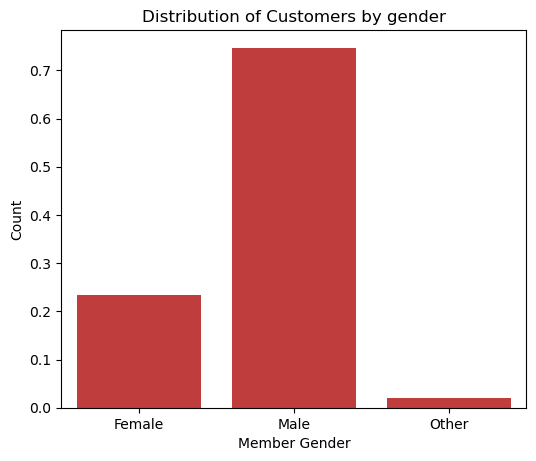

In [20]:
plt.figure(figsize = (6,5), dpi = 100)

counts = df['member_gender'].value_counts(normalize = True)
# plotting a bar chart
sns.barplot(x = counts.index, y = counts.values, color=base_color)

# calling our function
x_y_t('Member Gender','Count',"Distribution of Customers by gender")

print(counts * 100)
plt.show();

**Graph Conclusion**: Males represent 74.6 percent of users, whereas Females represents 23.3 percent, the remainder is others with 2.1 percent. All values approximated

### What is the distribution and percentage of the user_type based on the number count

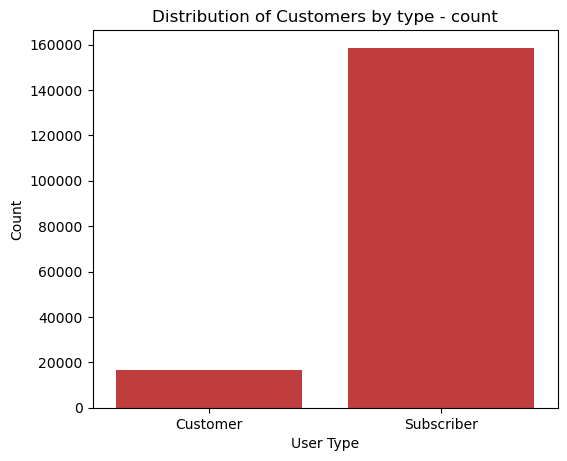

In [21]:
plt.figure(figsize = (6,5), dpi = 100)

# plotting a count plot
plot = sns.countplot(data=df, x='user_type', color=base_color)

# calling our function
x_y_t('User Type','Count',"Distribution of Customers by type - count")
plt.show()

Subscriber    90.531117
Customer       9.468883
Name: user_type, dtype: float64


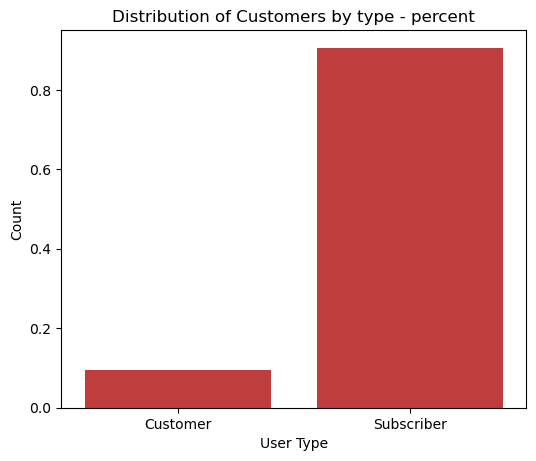

In [22]:
plt.figure(figsize = (6,5), dpi = 100)

# plotting a bar chart
counts = df['user_type'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)

# calling our function
x_y_t('User Type','Count',"Distribution of Customers by type - percent")
print(counts * 100)
plt.show()

**Graph Conclusion**: Customers represent 9.47 percent of users, whereas subscribers represents 90.53 percent. It shows subsribers get more trips than customers

### the distribution of the whole population based on their age

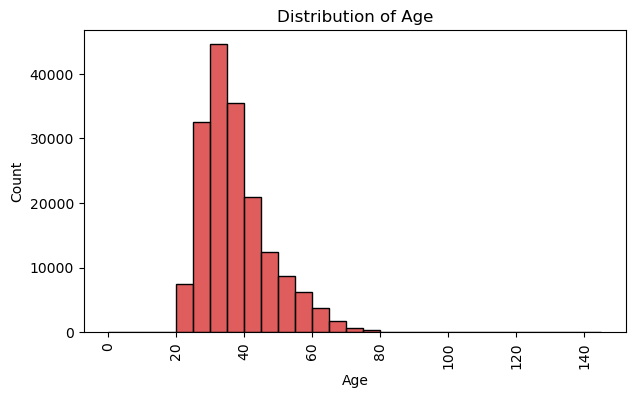

In [23]:
# Distribution of Age
plt.figure(figsize = (7,4), dpi = 100)

# plotting a hist
bins = np.arange(0, df['Age'].max()+5, 5)
sns.histplot(data=df, x='Age', color=base_color, bins = bins)

# calling our function
x_y_t('Age','Count',"Distribution of Age")
plt.xticks(rotation=90)
plt.show()

In [24]:
len(df[df["Age"] <= 45]) / len(df["Age"]) * 100

82.08594357309434

**Graph Conclusion**: The distribution follows a typical age distribution (Skewed to the right). Those aged 20 - 45 are the most demanding segment for rides as they are the most active population either in work or school.

### How many percent of the population had a ride of 30minutes or less

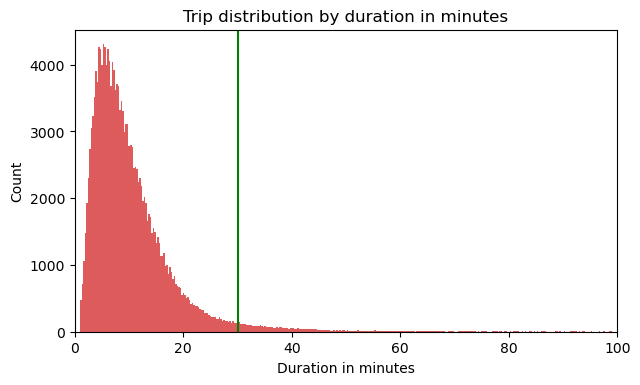

In [25]:
# trip distribution by duration
plt.figure(figsize = (7, 4), dpi = 100)

# plotting a hist
sns.histplot(data = df, x = "duration_minute", color = base_color)

# calling our function
x_y_t('Duration in minutes','Count',"Trip distribution by duration in minutes")

# Defining the x axis limit
plt.xlim(0, 100)

# locating the line where the x axis is 30min
plt.axvline(x=30, color = "green")
plt.show()

In [26]:
len(df[df["duration_minute"] <= 30]) / len(df["duration_minute"]) * 100

96.5607709543189

In [27]:
len(df[df["duration_minute"] > 60]) / len(df["duration_minute"]) * 100

0.7922172938863232

**Graph Conclusion**: from the distribution of duraction we can notice that more than 96.56 percent of trips were less than 30 minutes. We can also notice that only 0.79 percent of trips are of duration more than 1 hour. These might be considered as outliers that needs to be removed before going further in the bivariate analysis.

### what hour of the day will be categorized as a peak hour

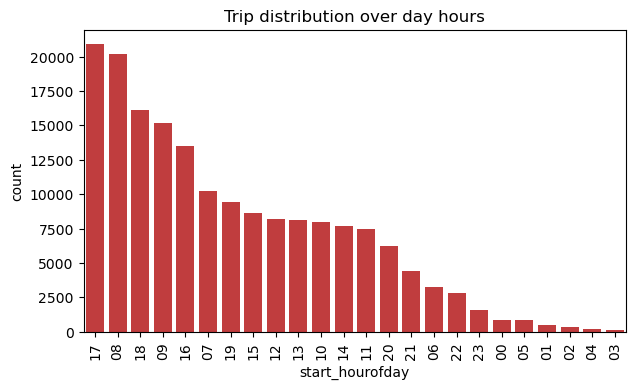

In [28]:
# trip distribution over day hours
plt.figure(figsize = (7,4), dpi = 100)

# defining the order of start_hourofday
order = df["start_hourofday"].value_counts().index

# plotting a count plot
sns.countplot(data = df, x = "start_hourofday", color = base_color, order = order)
plt.title("Trip distribution over day hours")

# rotating the start_hourofday values
plt.xticks(rotation = 90)
plt.show()

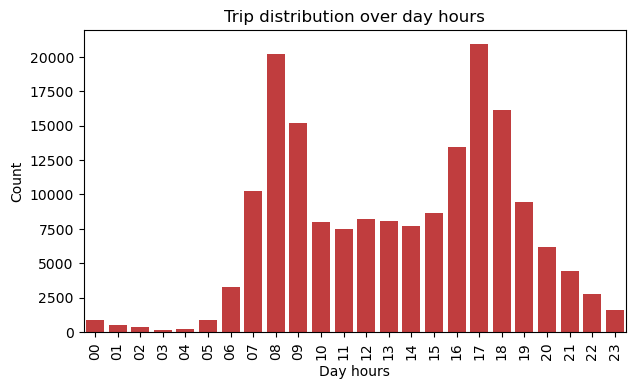

In [29]:
# trip distribution over day hours
plt.figure(figsize = (7,4), dpi = 100)

# defining the range of hour, given it a 24 hour range which is a full day
hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_categ = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
df['start_hourofday'] = df['start_hourofday'].astype(hour_categ)

# plotting a count plot
sns.countplot(data = df, x = "start_hourofday", color = base_color)

# calling our function
x_y_t('Day hours','Count',"Trip distribution over day hours")

# rotating the Day_hours values
plt.xticks(rotation = 90)
plt.show()

**Graph Conclusion**: From the graph we can see that peak hours are those from 7 - 9 am and from 4 - 7 pm. This might be related to the time when employees and students go to and leave work or school.

### What day of the week do we have the most ride

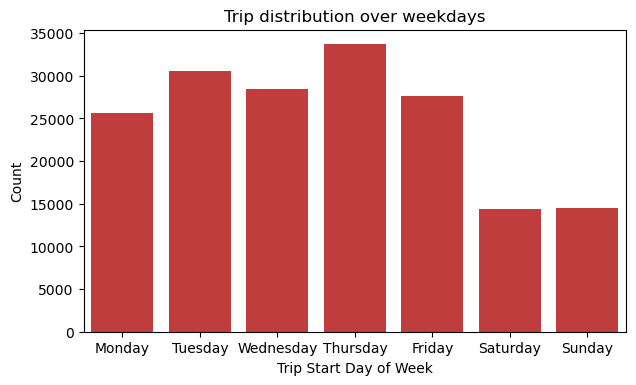

In [30]:
# trip distribution over weekdays
plt.figure(figsize = (7,4), dpi = 100)

# defining the days of the week and storing it as weekday
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekday_categ)

# plotting a count plot
sns.countplot(data=df, x='start_dayofweek', color=base_color)

# calling our function
x_y_t('Trip Start Day of Week','Count',"Trip distribution over weekdays")
plt.show()

**Graph Conclusion**: The demand for trips gradually increases untill reaching its highest levels on Thursday, it then declines untill reaching its lowest levels on Saturday and Sunday. This is due to the fact that Saturday and Sunday are the weekend in US.

### What month of the year do we have the most ride

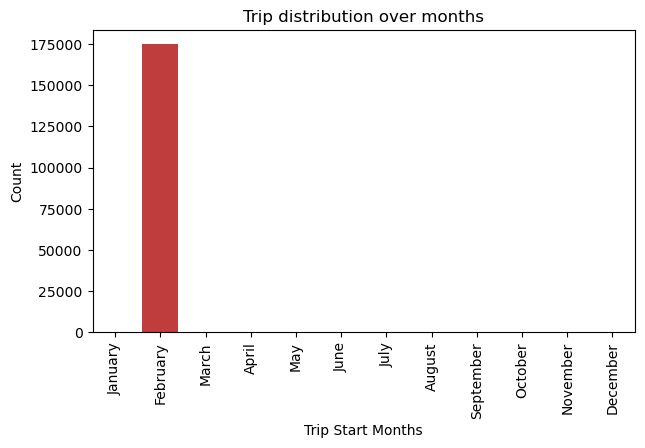

In [31]:
# trip distribution over months
plt.figure(figsize = (7,4), dpi = 100)

# defining the months in a year and storing it as month
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_categ = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(month_categ)

# plotting a count plot
sns.countplot(data=df, x='start_month', color=base_color)

# calling our function
x_y_t('Trip Start Months','Count',"Trip distribution over months")

# rotating the trip start_months values
plt.xticks(rotation=90)
plt.show()

**Graph Conclusion**: It looks like all trips were taken in the month of February.

### Removing outliers

In [32]:
# filtering the dataframe to remove outliers
df1 = df[df["Age"] <= 80]
df2 = df1[df["duration_minute"] <= 60]
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,Age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February,48.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,February,63.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,19.116667,2019-02-28,23,Thursday,February,39.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,26.916667,2019-02-28,23,Thursday,February,33.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,26.166667,2019-02-28,23,Thursday,February,34.0


In [33]:
# quick check
df2["Age"].describe()

count    173355.000000
mean         37.114453
std           9.863153
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          80.000000
Name: Age, dtype: float64

In [34]:
# quick check
df2["duration_minute"].describe()

count    173355.000000
mean         10.311244
std           7.395258
min           1.016667
25%           5.366667
50%           8.450000
75%          13.000000
max          59.933333
Name: duration_minute, dtype: float64

### The distribution(s) of variable(s) of interest:
1.  Males represent 74.6 percent of users, whereas Females represents 23.3 percent, the remainder is others with 2.1 percent. All values approximated
2. from the distribution of duraction we can see that more than 96.56 percent of trips were less than 30 minutes. We can also notice that only 0.79 percent of trips are of duration more than 1 hour. These might be considered as outliers that needs to be removed before going further in the bivariate analysis.
3. From the graph we can see that peak hours are those from 7 - 9 am and from 4 - 7 pm. This might be related to the time when employees and students go to and leave work or school. This is was also consistent with the distribution of trips over weekdays, where work days have the most demand for trips.
4. The distribution follows a typical age distribution (Skewed to the right). Those aged 20 - 45 are the most demanding segment for rides as they are the most active population either in work or school.
5. Customers represent 9.47 percent of users, whereas subscribers represents 90.53 percent, which shows subscribers get more trip maybe because of their subscriptions

### Unusual distributions:
1. The Age also has some outliers that we removed (age greater than 80).
2. The distribution of duration was surprising, 96.6 percent of trips were 30 mintes or less. There were some outliers that we removed (trips greater than 60 minutes).
3. We created new features out of the time variable (duration_minute, start_date, start_hourofday, start_outofweek, start_month)

## Bivariate Exploration
> In this section, we will investigate relationships between pairs of variables in our data.


#### What is the relationship between Trip duration_minute and Age

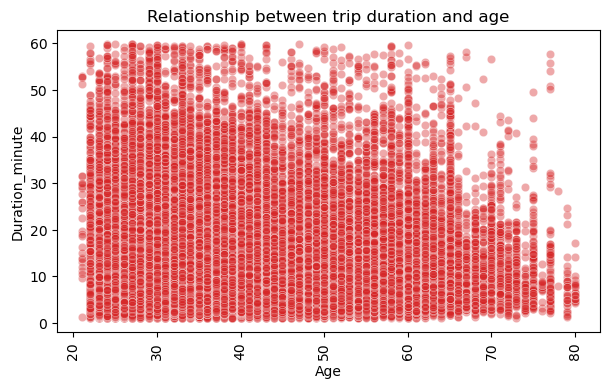

In [35]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a scatter plot
sns.scatterplot(data=df2, y='duration_minute',x='Age',color=base_color,alpha= 0.4)

# calling our function
x_y_t('Age','Duration_minute',"Relationship between trip duration and age")

# rotating the age values
plt.xticks(rotation = 90)

plt.show()

**Graph Conclusion**: A clear negative relationship between age and trip duration

#### What is the relationship between Trip duration in minute and Gender

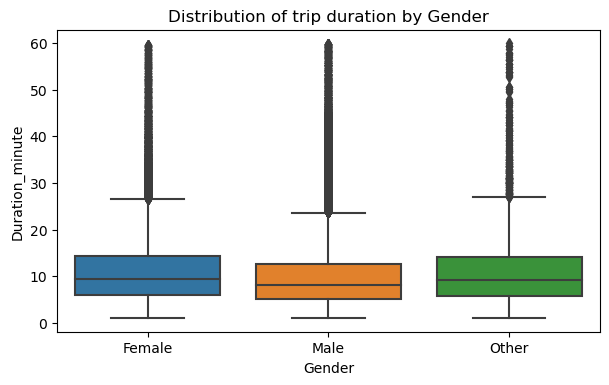

In [36]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a box plot
sns.boxplot(data = df2, x = "member_gender", y = "duration_minute")

# calling our function
x_y_t('Gender','Duration_minute',"Distribution of trip duration by Gender")
plt.show();

**Graph Conclusion**: Male riders seem to have shorter trips compared to females and other gender types, this is edvident by smaller median and shorter IQR. However, the difference is very small and we are not sure whether it is significant or not.

#### What is the relationship between Trip duration in minute and User_type

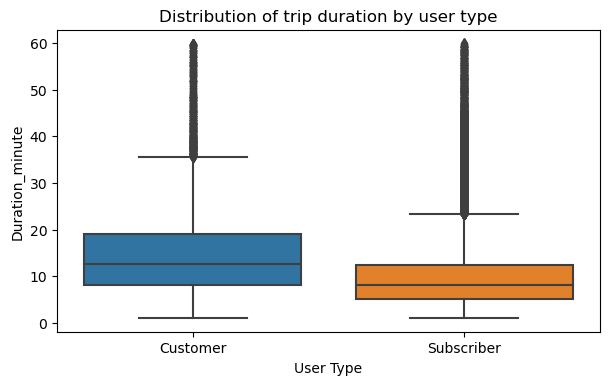

In [37]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a box plot
sns.boxplot(data = df2, x = "user_type", y = "duration_minute")

# calling our function
x_y_t('User Type','Duration_minute',"Distribution of trip duration by user type")
plt.show();

**Graph Conclusion**: Subscribers have shorter trips, whearas casual riders (customers) have longer trips.

#### What is the relationship between usser_type and start_dayofweek

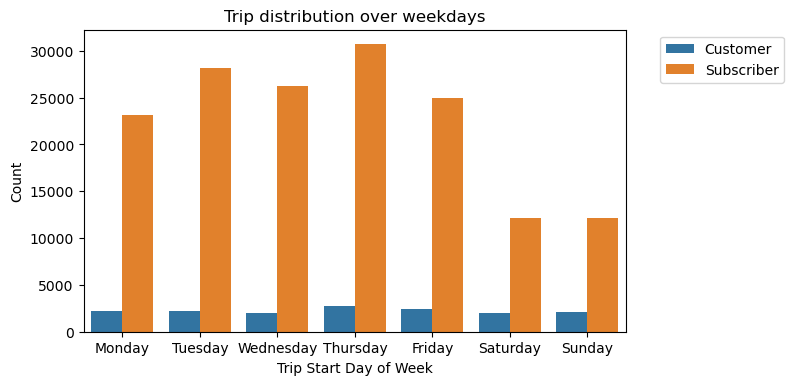

In [38]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a count plot
sns.countplot(data=df2, x='start_dayofweek', hue='user_type')

# calling our function
x_y_t('Trip Start Day of Week','Count',"Trip distribution over weekdays")

# Positioning the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Graph Conclusion**: Subscribers seem to have consistent usage for a specific purpose every day, mainly: work and study. As a result the number of their rides declines the most at weekends

#### What is the relationship between user_type and start_dayofday

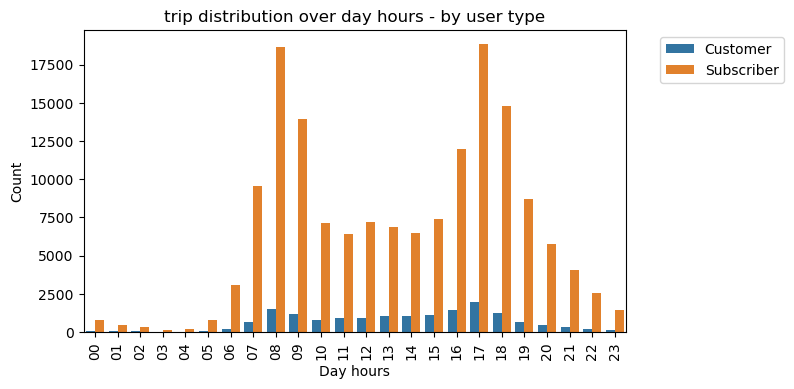

In [39]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a count plot
sns.countplot(data = df2, x = "start_hourofday", hue='user_type')

# calling our function
x_y_t('Day hours','Count',"trip distribution over day hours - by user type")

# rotating the day_hours values
plt.xticks(rotation = 90)

# Positioning the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Graph Conclusion**: From the graph we can see that peak hours for both user types are those from 7 - 9 am and from 4 - 7 pm. This might be related to the time when employees and students go to and leave work and school.

#### What is the relationship between Trip duration in minute and start_dayofweek

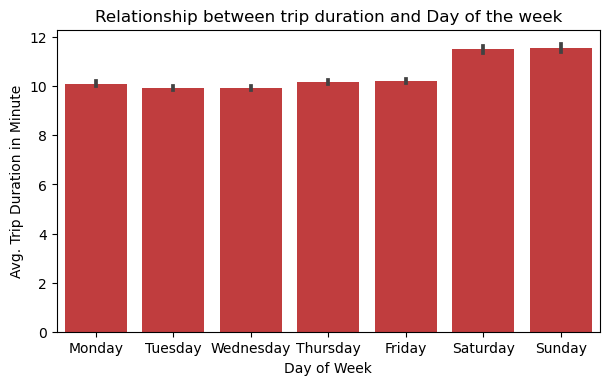

In [40]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a bar plot
sns.barplot(data = df2, x = "start_dayofweek", y = "duration_minute", color=base_color)

# calling our function
x_y_t('Day of Week','Avg. Trip Duration in Minute',"Relationship between trip duration and Day of the week")
plt.show()

**Graph Conclusion**: The graph reflects stable use along work days. Trip duration is longer during weekends, reflecting more casual and entertainment usage.

### Some of the relationships observed in this part of the investigation:
1. There are way more subscribers than customers. 
2. Subscribers usage seem to be very consistent, their usage is intended for daily routine such as work or study.
3. Subscribers usage reaches its highest levels during work days rush hour. 
4. On the other hand Customers tend to use bikes for fun, their usage is concentrated during weekends at midnights and middays.

### Interesting relationships between the other features:
1. It was surprising to see customers' ride mostly occur during midnight and midday

## Multivariate Exploration
> In this section, we will investigate relationships between multiple variables in our data.

#### What is the relationship between Gender and duration for each user_type

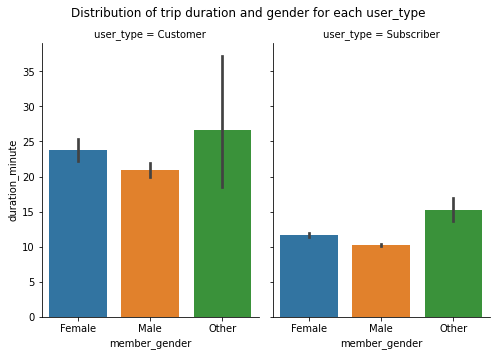

In [41]:
# plotting a cat plot
plot = sns.catplot(x = "member_gender", y = "duration_minute",
                col = "user_type",
                data = df, kind = "bar",
                height=5, aspect=.7)

# adjusting the subplot
plot.fig.subplots_adjust(top=0.88)

# giving the plot a suptitle
plot.fig.suptitle('Distribution of trip duration and gender for each user_type');

**Graph Conclusion**: Across all genders customers have higher mean trip duration than subscribers

#### What is the relationship between Age, trip duration for each user_type

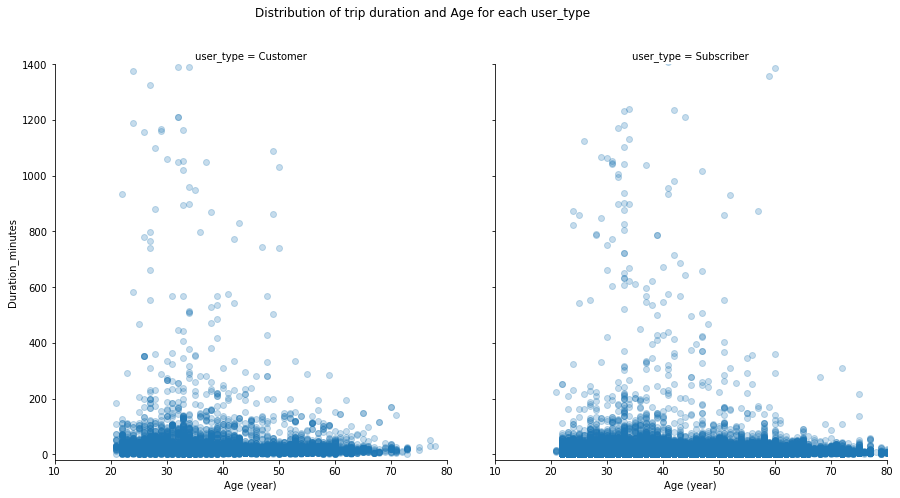

In [42]:
user_types = sns.FacetGrid(data = df1, col = 'user_type', col_wrap = 2,
                           xlim = [10,80], ylim = [-20, 1400])
user_types.map(plt.scatter, 'Age', 'duration_minute', alpha=0.25)
user_types.fig.set_size_inches(14,8);
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration_minutes')

# Adjusting the subplots
user_types.fig.subplots_adjust(top=0.88)

# Defining the title
user_types.fig.suptitle('Distribution of trip duration and Age for each user_type')
plt.show;

**Graph Conclusion**: Younger Customers trip duration is slightly more than younger subscribers

#### What is the relationship between start_dayofweek and duration_minute for each user_type

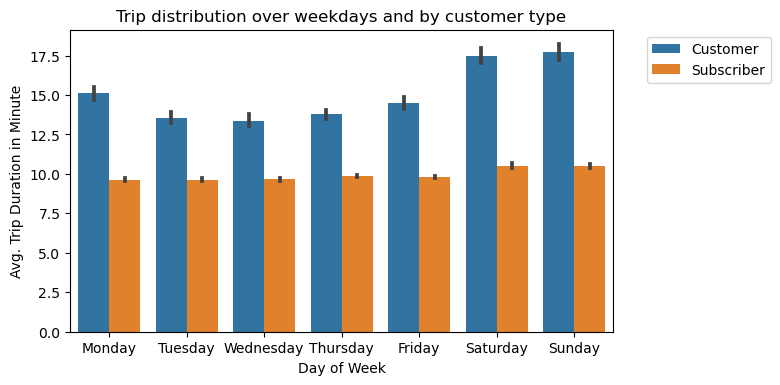

In [43]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a bar plot
sns.barplot(data = df2, x = "start_dayofweek", y = "duration_minute", hue='user_type')

# calling our function
x_y_t('Day of Week','Avg. Trip Duration in Minute',"Trip distribution over weekdays and by customer type")

# positioning the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Graph Conclusion**: Customers have consistently longer trips than subscribers

#### What is the relationship between start_hourofweek and duration_minute for each user_type

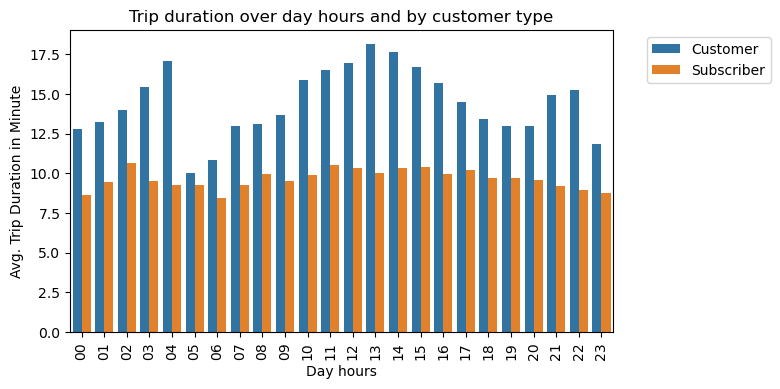

In [44]:
plt.figure(figsize = (7,4), dpi = 100)

# plotting a bar plot
sns.barplot(data = df2, x = "start_hourofday", y = "duration_minute",   hue='user_type', ci = None)

# calling our function
x_y_t('Day hours','Avg. Trip Duration in Minute',"Trip duration over day hours and by customer type")

# rotating the day_hours 
plt.xticks(rotation = 90)

# positioning the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Graph Conclusion**: Customers have consistently longer trips across all hours of the day than subscribers. Also, customer trips are much longer at midnight and midday

### Some of the relationships you observed in this part of the investigation:
1. Customers have consistently longer trips than subscribers. 
2. Customers have consistently longer trips across all hours of the day.
3. Younger Customers trip duration is slightly more than younger subscribers.

### Were there any interesting or surprising interactions between features?
1. The majority of older users are Subscribers and they spend little time in their bike trips.